In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir Pothole.v1-raw.yolov8

In [ ]:
!unzip Pothole.v1-raw.yolov8.zip -d ./potholedamge

unzip:  cannot find or open Pothole.v1-raw.yolov8.zip, Pothole.v1-raw.yolov8.zip.zip or Pothole.v1-raw.yolov8.zip.ZIP.


In [ ]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
### 영상 출력 함수
def fn_imshow(img, axis='on', **kwargs):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(**kwargs)
    if axis!='on': plt.axis('off')
    plt.imshow(img_rgb)
    plt.show()

In [ ]:
from ultralytics import YOLO, checks

ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
checks()

NameError: name 'checks' is not defined

In [ ]:
# Install the ultralytics package using pip
!pip install ultralytics --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 11.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
# Load a model
model = YOLO('yolov8s.yaml').load('yolov8s.pt') # build from YAML and transfer weights

In [ ]:
# Install the ultralytics package using pip
!pip install ultralytics --upgrade

In [ ]:
# Train the model
model.train(data=r'/content/potholedamge/data.yaml',
            epochs=100,
           pretrained='yolov8s.pt',
            batch=-1,
            imgsz=640,
            patience=100,
            project='pothole_pt')

Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/potholedamge/data.yaml, epochs=100, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=pothole_pt, name=train6, exist_ok=False, pretrained=yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

train: Scanning /content/potholedamge/train/labels.cache... 465 images, 0 backgrounds, 0 corrupt: 100%|██████████| 465/465 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/potholedamge/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100%|██████████| 133/133 [00:00<?, ?it/s]


Plotting labels to pothole_pt/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0006328125), 63 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.8G      1.948      3.422       1.75        252        640: 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all        133        330    0.00376      0.455     0.0284    0.00972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.7G      1.721      3.157      1.596        273        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all        133        330    0.00652      0.788      0.231      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.7G      1.524      2.214      1.396        246        640: 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.93s/it]

                   all        133        330    0.00699      0.845      0.307      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.7G      1.415      1.805      1.301        291        640: 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.20s/it]

                   all        133        330          1     0.0716      0.289      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      10.8G      1.407      1.658      1.271        283        640: 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all        133        330      0.585     0.0939      0.156     0.0776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.6G      1.366      1.589      1.268        285        640: 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all        133        330      0.807      0.127      0.233      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      10.7G      1.362      1.484      1.254        306        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all        133        330      0.205      0.121      0.111     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.7G      1.385       1.54      1.291        339        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all        133        330      0.587      0.331       0.38       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.7G      1.321      1.453      1.246        270        640: 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

                   all        133        330      0.416        0.3      0.275      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.7G      1.346      1.428      1.268        270        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all        133        330      0.515       0.33      0.339      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      10.6G      1.346      1.394      1.268        324        640: 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]

                   all        133        330      0.607      0.348      0.427      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      10.6G      1.318      1.381      1.254        257        640: 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all        133        330      0.401      0.357      0.301      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.6G      1.335      1.335       1.25        324        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all        133        330      0.319      0.269      0.193     0.0873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.8G      1.351      1.329      1.267        268        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all        133        330      0.126       0.17     0.0616     0.0235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.8G       1.37      1.328      1.268        327        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all        133        330      0.197     0.0455     0.0353     0.0141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      10.6G      1.338      1.306      1.266        251        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all        133        330      0.338       0.23      0.174     0.0798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      10.7G      1.361      1.298       1.28        294        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all        133        330      0.245      0.212      0.152     0.0735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      10.6G      1.362      1.301      1.302        260        640: 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all        133        330      0.366      0.258      0.258      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.7G      1.317      1.231      1.251        249        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all        133        330      0.347      0.215       0.18     0.0767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      10.6G       1.33      1.209      1.258        342        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all        133        330      0.284      0.261       0.19     0.0804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      10.6G       1.32      1.215      1.253        252        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all        133        330      0.492      0.291      0.306      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.7G      1.302      1.161      1.243        299        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all        133        330      0.454      0.403      0.388      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      10.8G      1.289      1.126      1.216        298        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all        133        330      0.501      0.451      0.453       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      10.8G       1.26      1.114      1.227        282        640: 100%|██████████| 6/6 [00:04<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.24s/it]

                   all        133        330      0.488      0.455      0.441      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      10.7G      1.285       1.09      1.224        310        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all        133        330      0.499      0.424       0.42      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      10.7G      1.273      1.069       1.23        326        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all        133        330      0.444      0.361      0.341      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      10.7G        1.3      1.104      1.246        259        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all        133        330      0.472      0.533      0.481       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.6G      1.251      1.035      1.203        320        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all        133        330      0.386      0.324      0.275       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      10.6G      1.265      1.066      1.217        256        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all        133        330      0.608        0.4       0.47      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      10.6G      1.231      1.008      1.191        343        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

                   all        133        330      0.387      0.239      0.205      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      10.7G      1.198     0.9839      1.178        334        640: 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all        133        330      0.462      0.452      0.413      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      10.7G      1.213     0.9596      1.176        298        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all        133        330      0.625      0.412      0.468      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      10.6G      1.218     0.9984      1.208        268        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all        133        330      0.587      0.436      0.455      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.6G      1.168     0.9237      1.162        318        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all        133        330      0.642      0.518      0.569      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      10.7G       1.18     0.9166      1.171        338        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all        133        330      0.659      0.498      0.556       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      10.7G      1.157     0.8922      1.151        301        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all        133        330      0.694       0.53        0.6      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      10.6G      1.184     0.9279      1.149        296        640: 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all        133        330      0.608      0.473      0.526      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      10.7G      1.167     0.9121      1.155        309        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]

                   all        133        330      0.719      0.611      0.686      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      10.7G      1.143     0.8755      1.152        315        640: 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all        133        330       0.69      0.606      0.668      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      10.6G      1.147     0.9045      1.157        267        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all        133        330      0.703      0.655      0.676      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.7G      1.138     0.8787      1.135        260        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all        133        330      0.753        0.6      0.665      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      10.6G      1.123     0.8623      1.126        291        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all        133        330      0.779      0.545      0.673      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.7G      1.114     0.8445      1.129        338        640: 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

                   all        133        330      0.713      0.606      0.657      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      10.7G      1.076     0.8207      1.116        306        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all        133        330      0.714      0.533       0.62      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      10.7G      1.068     0.7943      1.095        306        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all        133        330      0.738      0.573      0.672       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      10.7G      1.104      0.818      1.126        268        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all        133        330      0.645      0.536      0.577      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      10.7G      1.078     0.8231       1.12        319        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all        133        330      0.561      0.485      0.532      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      10.7G      1.096     0.8066      1.122        351        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all        133        330      0.687      0.594      0.646      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      10.8G      1.071     0.7738      1.111        274        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all        133        330      0.749      0.533       0.63       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      10.6G      1.067     0.7602      1.099        287        640: 100%|██████████| 6/6 [00:04<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all        133        330      0.799      0.564      0.673      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      10.6G      1.028     0.7484      1.092        283        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all        133        330      0.661       0.67      0.688       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      10.6G      1.057     0.7623      1.088        337        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all        133        330      0.724      0.677      0.723      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.6G      1.042     0.7377      1.094        310        640: 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all        133        330      0.739      0.624      0.698      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      10.6G      1.044     0.7468      1.105        279        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all        133        330      0.766        0.6      0.691       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      10.8G      1.002     0.7271      1.079        289        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all        133        330       0.73      0.614      0.693      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      10.7G      1.037     0.7279      1.085        335        640: 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all        133        330      0.715      0.576       0.63      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      10.6G      1.031     0.7263      1.092        264        640: 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all        133        330      0.703      0.627      0.663      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      10.7G      1.002     0.7264      1.088        272        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all        133        330      0.734       0.63      0.668      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      10.6G     0.9579      0.683      1.052        237        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all        133        330      0.775      0.584      0.672      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      10.7G     0.9963     0.6983      1.061        241        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all        133        330       0.76      0.594      0.663      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.8G     0.9693     0.6812      1.049        293        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all        133        330      0.795      0.647      0.725      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      10.8G     0.9812     0.6666      1.058        301        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all        133        330      0.732      0.682      0.721      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      10.7G     0.9864     0.6807      1.071        251        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all        133        330      0.749      0.661       0.71       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      10.8G     0.9736     0.6544      1.063        325        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all        133        330      0.755      0.603      0.683      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      10.7G     0.9758     0.6549      1.054        311        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all        133        330      0.786      0.639      0.723      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      10.8G     0.9534     0.6596      1.046        296        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all        133        330      0.826      0.624       0.73      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      10.7G     0.9663     0.6544      1.063        273        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all        133        330      0.691      0.659      0.703      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      10.6G     0.9556     0.6517      1.045        320        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all        133        330      0.772      0.658      0.759      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      10.7G      0.937     0.6452      1.044        337        640: 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all        133        330      0.742      0.652      0.728      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      10.7G     0.9399     0.6388      1.049        296        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all        133        330      0.778      0.614      0.729      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      10.7G     0.9417     0.6518      1.058        268        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all        133        330      0.741      0.676      0.745      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      10.7G     0.9384     0.6483       1.04        256        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all        133        330      0.823      0.636      0.747      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      10.7G     0.9091     0.6232      1.027        295        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all        133        330      0.803      0.631      0.726      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      10.7G     0.8942     0.6025      1.039        280        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all        133        330      0.798       0.63      0.736      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      10.6G     0.8852     0.6057      1.022        303        640: 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all        133        330      0.788      0.655      0.738      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      10.8G     0.9158     0.6089      1.031        292        640: 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all        133        330      0.766      0.655      0.723       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.7G     0.8961      0.592      1.024        287        640: 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all        133        330      0.817      0.649      0.745      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      10.7G     0.8983     0.6042      1.028        247        640: 100%|██████████| 6/6 [00:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all        133        330      0.711      0.721      0.745       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      10.6G     0.8693     0.5748      1.003        343        640: 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all        133        330      0.785      0.673      0.759      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      10.3G     0.8711     0.5793      1.012        255        640: 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all        133        330      0.843      0.688      0.766      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      10.8G     0.8761     0.5764      1.017        234        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all        133        330      0.803      0.704      0.757      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      10.8G     0.8414     0.5558     0.9963        319        640: 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all        133        330      0.809      0.661      0.749      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      10.7G     0.8479     0.5701      1.005        292        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all        133        330      0.814      0.667       0.75      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      10.8G     0.8534     0.5606      1.009        254        640: 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all        133        330      0.853      0.648      0.752      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      10.7G     0.8461     0.5563     0.9975        364        640: 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all        133        330      0.776      0.664       0.73      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      10.8G     0.8309     0.5577     0.9862        279        640: 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all        133        330      0.867      0.652      0.761      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      10.6G     0.8205     0.5467     0.9996        269        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all        133        330        0.8      0.676      0.759      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      10.8G     0.8375     0.5498      1.004        233        640: 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all        133        330      0.868      0.609      0.746      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      10.7G     0.8024     0.5321     0.9914        289        640: 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all        133        330      0.764      0.667      0.756      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      10.7G     0.8288     0.5457      1.002        298        640: 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all        133        330       0.82      0.642      0.755      0.494


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      10.7G      0.777     0.5335     0.9484        187        640: 100%|██████████| 6/6 [00:11<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.15s/it]

                   all        133        330      0.859      0.612       0.73      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      10.6G     0.7423     0.4723     0.9412        136        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all        133        330      0.799      0.651      0.735       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      10.6G     0.7357     0.4629     0.9419        179        640: 100%|██████████| 6/6 [00:03<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all        133        330      0.817      0.652      0.742      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      10.7G     0.6967     0.4445     0.9225        141        640: 100%|██████████| 6/6 [00:03<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

                   all        133        330      0.808      0.664      0.756      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      10.7G     0.6987     0.4275      0.923        129        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all        133        330      0.837      0.653      0.762      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      10.7G     0.7025     0.4273     0.9209        166        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all        133        330      0.814      0.664      0.761      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      10.7G      0.681     0.4308     0.9098        172        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all        133        330      0.834      0.648      0.764      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      10.6G     0.6692     0.4113     0.9081        129        640: 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all        133        330      0.841      0.661      0.767      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      10.7G     0.6607     0.4084     0.9009        154        640: 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all        133        330       0.87      0.646      0.774      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      10.7G     0.6541     0.4103     0.8978        165        640: 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all        133        330      0.871      0.655      0.777      0.504



100 epochs completed in 0.161 hours.
Optimizer stripped from pothole_pt/train6/weights/last.pt, 6.3MB
Optimizer stripped from pothole_pt/train6/weights/best.pt, 6.3MB

Validating pothole_pt/train6/weights/best.pt...
Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


                   all        133        330      0.869      0.646      0.775      0.508
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to pothole_pt/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b6a72aa0790>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## ▶ Predict - Object Detection

In [ ]:
import cv2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
### 영상 출력 함수
def fn_imshow(img, axis='on', **kwargs):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(**kwargs)
    if axis!='on': plt.axis('off')
    plt.imshow(img_rgb)
    plt.show()

In [ ]:
#Load trained YOLOv8n model
pt_path = r"/content/pothole_pt/train/weights/best.pt"
model_best = YOLO(pt_path)

In [ ]:
# Read an image using OpenCV
src =r"/content/drive/MyDrive/data/dd.jpg"
source = cv2.imread(src)
# Run inference on the source
results = model_best(source)


0: 448x640 8 potholes, 21.1ms
Speed: 3.0ms preprocess, 21.1ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)


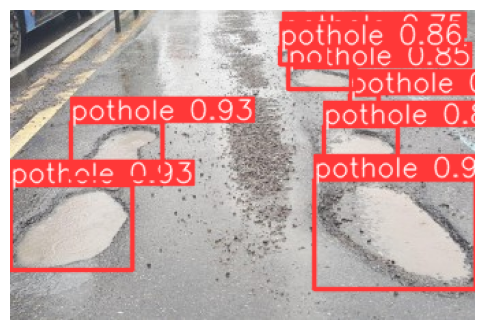

In [ ]:
# Plotting results
res_plotted = results[0].plot()
fn_imshow(res_plotted, figsize=(6,8), axis='')

In [ ]:
### Boxes
boxes = results[0].boxes
### Classe names
face_mask_classnames = {
    0: 'pothole',
    1: 'No pothole'
}

### DataFrame
boxes_arr = boxes.data.cpu().numpy()
col_names = ['xMin', 'yMin', 'xMax', 'yMax', 'conf', 'class']
boxes_df = pd.DataFrame(boxes_arr, columns=col_names)

### Add class names
boxes_df['class'] = boxes_df['class'].astype('int')
boxes_df['class_nm'] = [face_mask_classnames[i] for i in boxes_df['class']]
boxes_df

,xMin,yMin,xMax,yMax,conf,class,class_nm
0,44.626217,82.842636,111.043121,123.430023,0.931796,0,pothole
1,222.724442,124.852783,340.000000,204.357727,0.927654,0,pothole
2,0.000000,128.458069,89.867462,190.498230,0.927523,0,pothole
3,229.010193,85.870361,283.779999,114.189430,0.880693,0,pothole
4,197.681747,27.705383,230.369385,40.749329,0.857974,0,pothole
5,203.843567,42.510628,252.039520,58.571667,0.847720,0,pothole
6,199.045990,20.318720,221.812180,27.941942,0.751449,0,pothole
7,248.800262,62.558182,269.176147,75.237007,0.534800,0,pothole


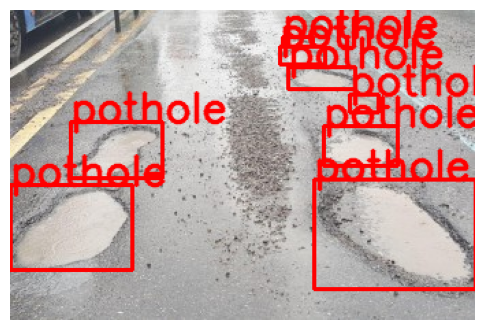

In [ ]:
# Plotting results
img_out = source.copy()
for i in range(boxes_df.shape[0]):
    ind_box = boxes_df.iloc[i][0:4].astype('int')
    ind_class = boxes_df.iloc[i][5].astype('int')
    ind_col = (0,0,255) if ind_class==0 else (255,0,0)
    cv2.rectangle(img_out, ind_box[:2], ind_box[2:], ind_col, 2)
    ind_class_nm = boxes_df.iloc[i][6]
    cv2.putText(img_out,ind_class_nm,ind_box[:2], 0, 1,ind_col,2,cv2.LINE_AA)

fn_imshow(img_out, figsize=(6,8), axis='')